In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Data for models and their performance metrics
data = {
    "Model": [
        "BERT Transformer (voted_up)",
        "BERT + Features (voted_up)",
        "LightGBM (voted_up)",
        "Ensemble Stacking (voted_up)",
        "Bagging LightGBM (voted_up)",
        "LightGBM (mentions_difficulty)",
        "XGBoost (mentions_difficulty)",
        "Ensemble Stacking XGB (mentions_difficulty)",
        "Ensemble Stacking LGBM (mentions_difficulty)",
        "Genre-Based Models (mentions_difficulty)"
    ],
    "Accuracy (%)": [93, 93, 91, 93, 91, 87, 86, 85, 88, 57],
    "Class 0 F1 Score (%)": [67, 66, 54, 63, 57, 92, 92, 91, 93, 69],
    "Class 1 F1 Score (%)": [96, 96, 95, 96, 95, 50, 49, 49, 49, 30],
    "Macro Average F1 Score (%)": [82, 81, 74, 80, 76, 71, 70, 70, 70, 49]
}

In [7]:
plt.style.use('dark_background')

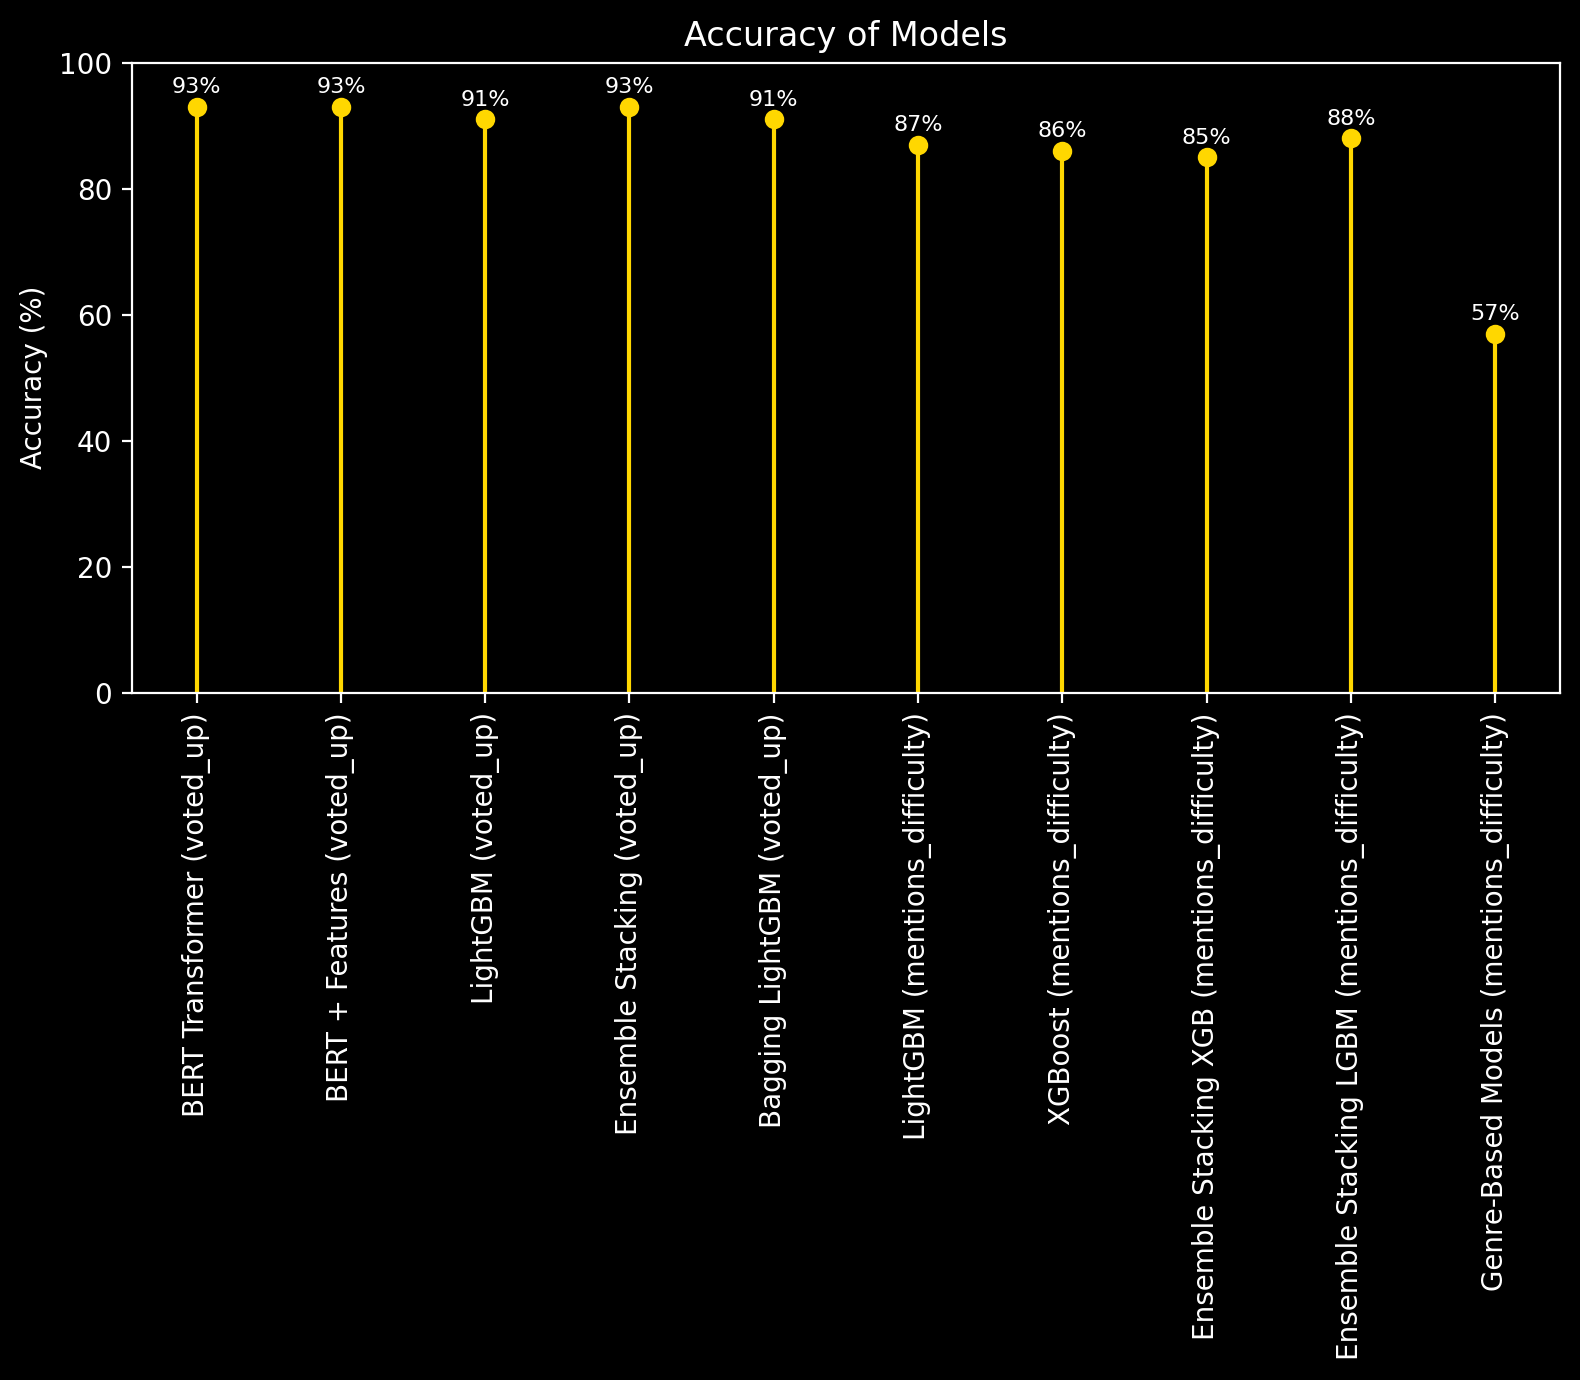

In [57]:
# Lollipop chart for Accuracy
plt.figure(figsize=(8, 7), dpi=200)
positions = range(len(data['Accuracy (%)']))
markerline, stemlines, baseline = plt.stem(positions, data['Accuracy (%)'], linefmt='gold', markerfmt='o', basefmt=" ")
plt.xticks(positions, data['Model'], rotation=90)
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Models")
plt.ylim(0,100)


for i, value in enumerate(data['Accuracy (%)']):
    plt.text(i, value + 1.5, f"{value}%", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

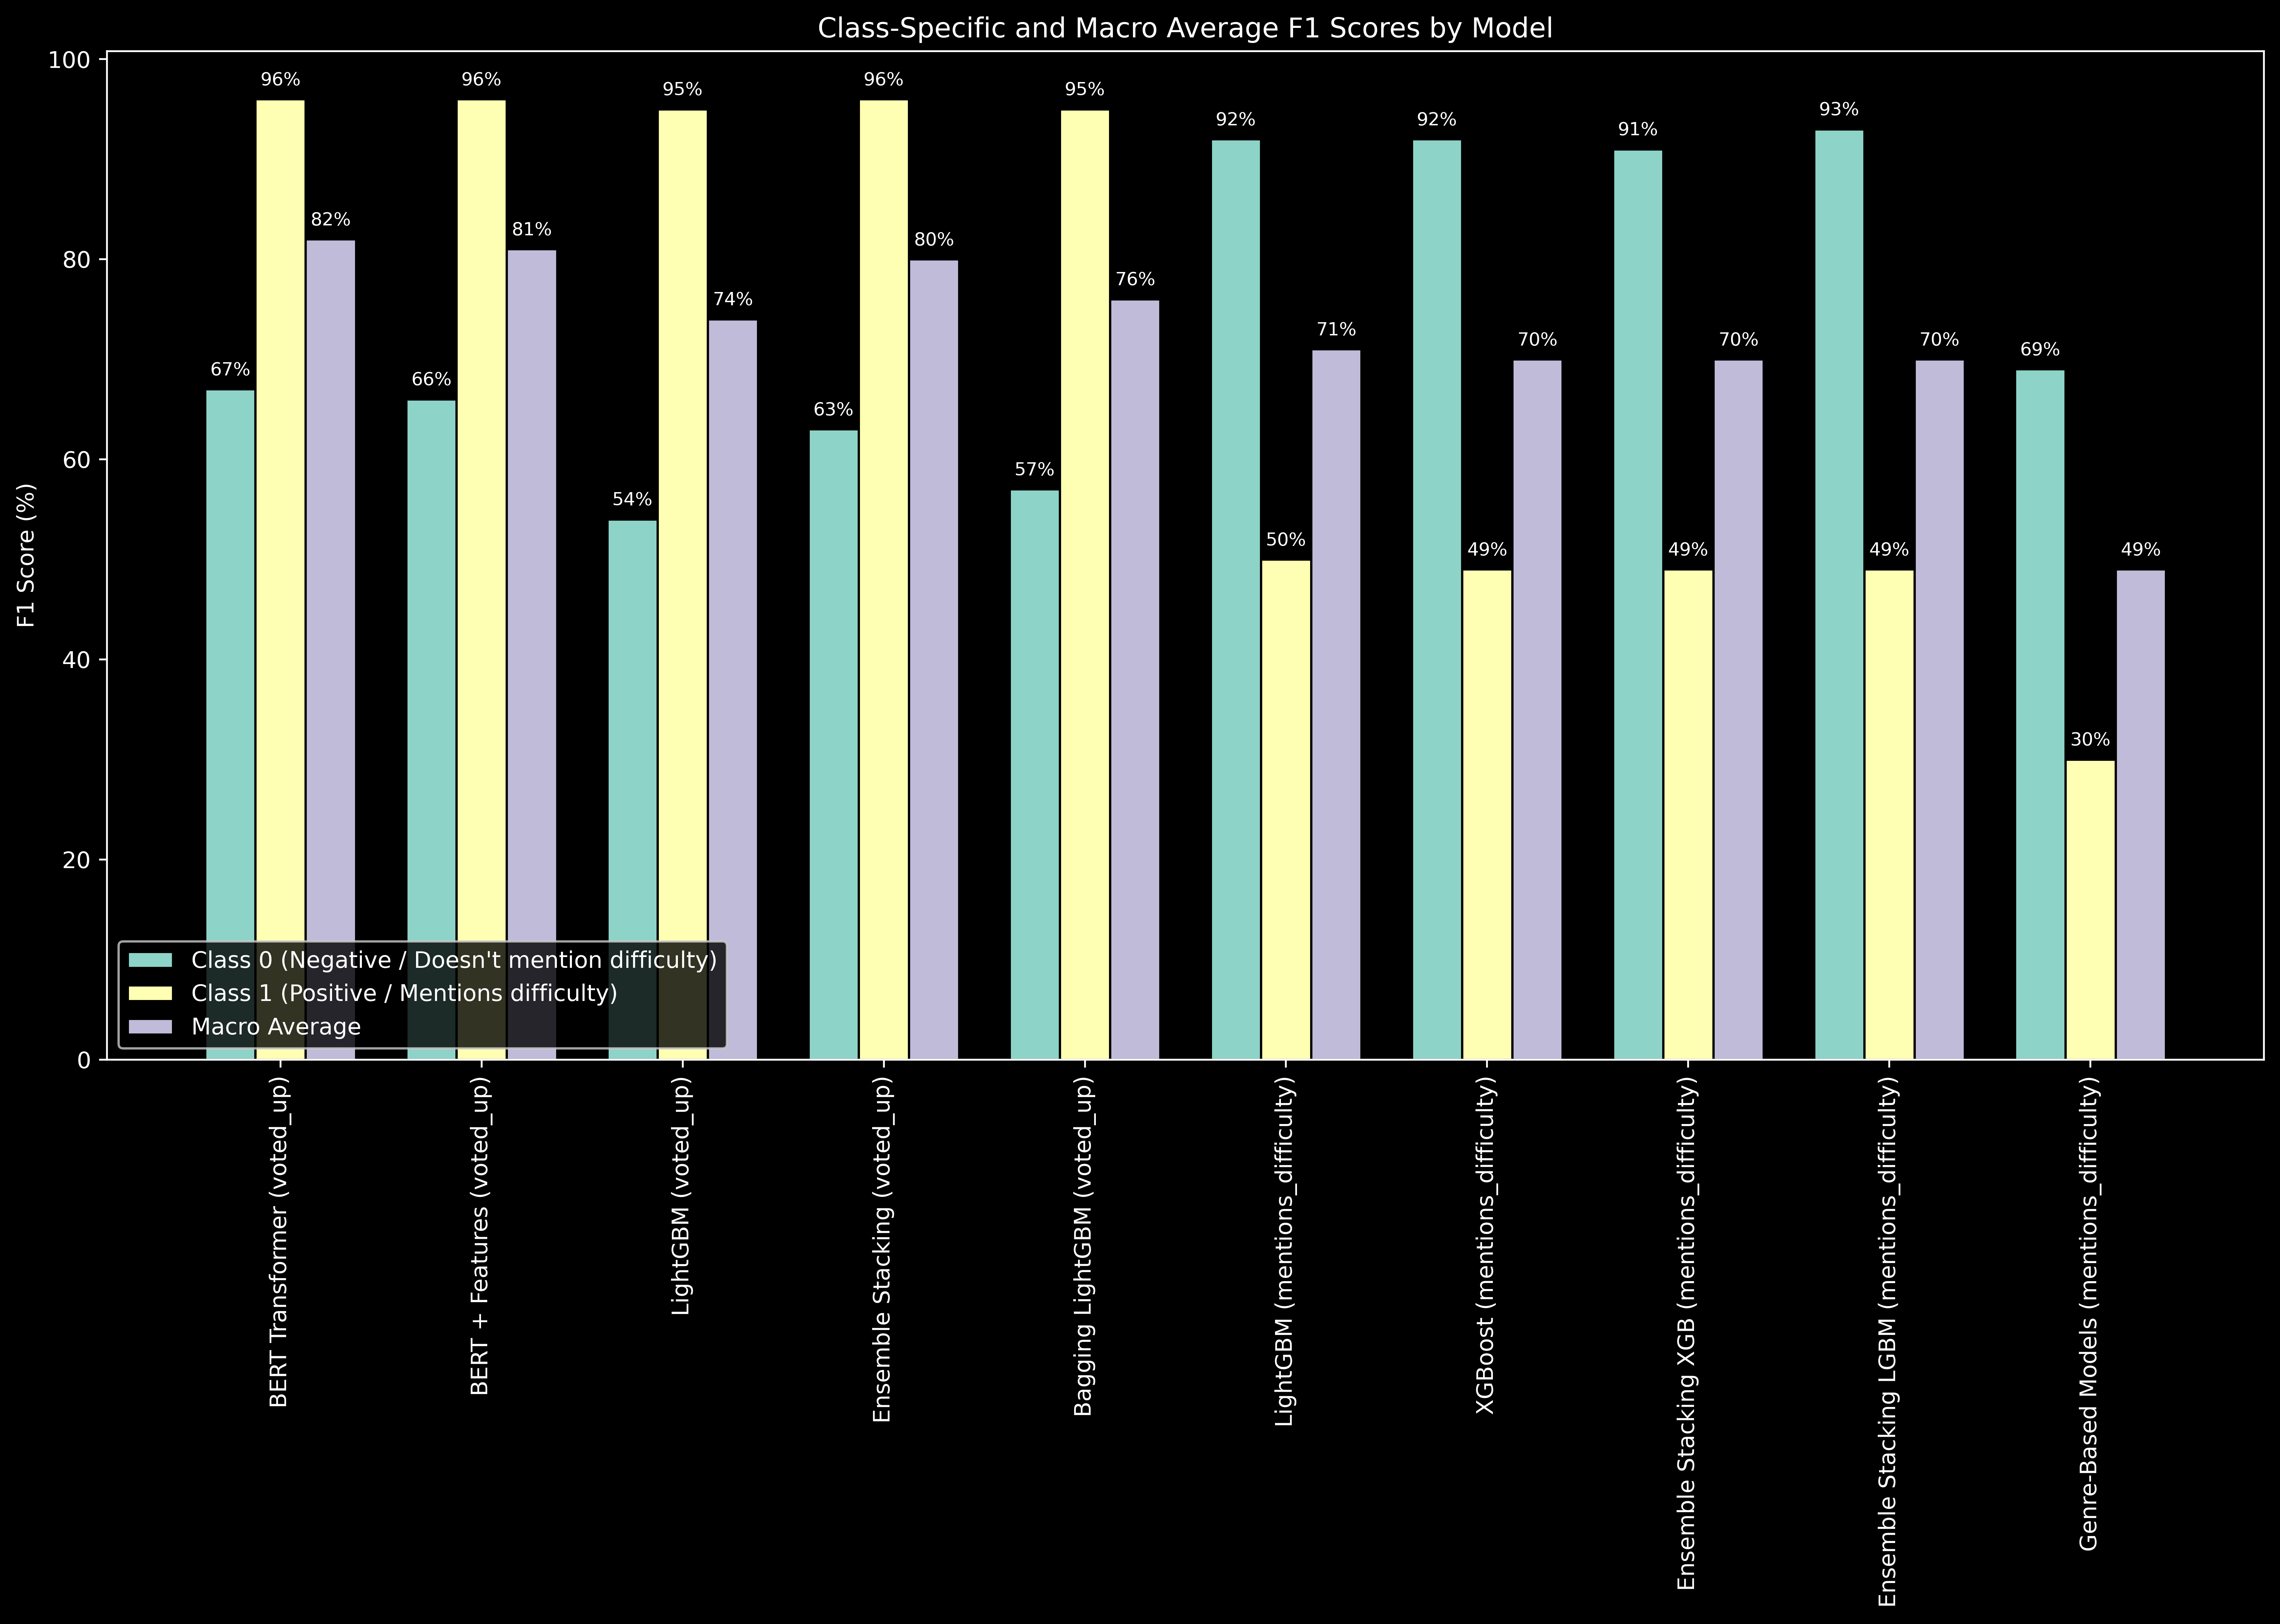

In [55]:
# Grouped bar plot for F1 Scores
fig, ax = plt.subplots(figsize=(14, 10), dpi=500)
bar_width = 0.25
index = np.arange(len(data['Model']))

bar1 = ax.bar(index, data['Class 0 F1 Score (%)'], bar_width, label='Class 0 (Negative / Doesn\'t mention difficulty)', edgecolor='black')
bar2 = ax.bar(index + bar_width, data['Class 1 F1 Score (%)'], bar_width, label='Class 1 (Positive / Mentions difficulty)', edgecolor='black')
bar3 = ax.bar(index + 2 * bar_width, data['Macro Average F1 Score (%)'], bar_width, label='Macro Average', edgecolor='black')

# Annotate F1 Score values
for bar_group in [bar1, bar2, bar3]:
    for bar in bar_group:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{int(bar.get_height())}%", ha='center', va='bottom', fontsize=8)

ax.set_xticks(index + bar_width)
ax.set_xticklabels(data['Model'], rotation=90)
ax.set_ylabel("F1 Score (%)")
ax.set_title("Class-Specific and Macro Average F1 Scores by Model")
ax.legend(loc="lower left")
fig.tight_layout()
plt.show()